<a href="https://colab.research.google.com/github/NaniDaChaman/Sparsh-coding-challenge-FA24/blob/main/Political_Dataset_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
donations = pd.read_csv('VandyDonations2024_2020.csv')

<h1>Data Cleaning</h1>

Replace empty vars with np.nan

In [3]:
donations = donations.replace(['NO DATA','N/A', 0, ''],np.nan)

In [4]:
donations.head()

,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00725820,THE LINCOLN PROJECT,2021,30R,202102049425013615,11AI,17380975,1498464,NaN,IND,...,F3X,4020520211120073037,t,NaN,2022,SA,NaN,4020620211121413917,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
1,C00375360,AMERICAN COLLEGE OF CARDIOLOGY PAC (HEARTPAC),2023,M2,202302179578656047,11AI,49E5B8A5D808EADECD4E,1689425,NaN,IND,...,F3X,4021720231732278051,t,NaN,2024,SA,NaN,4021720231732305100,https://docquery.fec.gov/cgi-bin/fecimg/?20230...,Contributions From Individuals/Persons Other T...
2,C00734012,ASCO ASSOCIATION POLITICAL ACTION COMMITTEE (A...,2023,M9,202309199597104077,11AI,4307946B72352EE6EE47,1725806,NaN,IND,...,F3X,4091920231802391159,t,NaN,2024,SA,NaN,4091920231802465409,https://docquery.fec.gov/cgi-bin/fecimg/?20230...,Contributions From Individuals/Persons Other T...
3,C00734012,ASCO ASSOCIATION POLITICAL ACTION COMMITTEE (A...,2023,M8,202308189596617015,11AI,454595293EFB39BAB98F,1722589,NaN,IND,...,F3X,4081820231799656080,t,NaN,2024,SA,NaN,4081820231799819714,https://docquery.fec.gov/cgi-bin/fecimg/?20230...,Contributions From Individuals/Persons Other T...
4,C00734012,ASCO ASSOCIATION POLITICAL ACTION COMMITTEE (A...,2023,M12,202312139599459666,11AI,4CD4BCE1C0941D2B0D98,1738535,NaN,IND,...,F3X,4121320231812273072,t,NaN,2024,SA,NaN,4121420231812523437,https://docquery.fec.gov/cgi-bin/fecimg/?20231...,Contributions From Individuals/Persons Other T...


In [5]:
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39267 entries, 0 to 39266
Data columns (total 79 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   committee_id                           39267 non-null  object 
 1   committee_name                         39267 non-null  object 
 2   report_year                            39267 non-null  int64  
 3   report_type                            38924 non-null  object 
 4   image_number                           39267 non-null  int64  
 5   line_number                            39267 non-null  object 
 6   transaction_id                         39264 non-null  object 
 7   file_number                            39267 non-null  int64  
 8   committee_name.1                       0 non-null      float64
 9   entity_type                            39267 non-null  object 
 10  entity_type_desc                       39267 non-null  object 
 11  un

In [6]:
#donations[donations['committee_name'].notna()].info() not necessary

Text(0, 0.5, 'Number of rows')

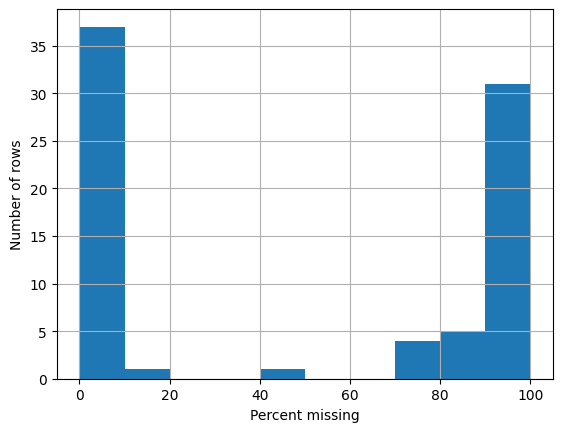

In [7]:
percent_missing_rows = donations.isnull().sum(axis=0) / len(donations)*100
missing_plt = percent_missing_rows.hist()
missing_plt.set_xlabel('Percent missing')
missing_plt.set_ylabel('Number of rows')

Potential columns to get rid off

In [8]:
percent_missing_rows[percent_missing_rows>50]

,0
committee_name.1,100.000000
unused_contbr_id,82.491660
contributor_prefix,99.544146
recipient_committee_org_type,99.337866
contributor_middle_name,98.291186
contributor_suffix,99.686760
contributor_street_2,98.507653
contributor_id,82.491660
receipt_type,72.740469
receipt_type_desc,71.795655


In [9]:
donations=donations.drop(labels=percent_missing_rows[percent_missing_rows>99].sort_values().index.tolist(),axis=1)#drop 100 percent empty

In [10]:
donations.select_dtypes(include= 'object').columns.tolist()

['committee_id',
 'committee_name',
 'report_type',
 'line_number',
 'transaction_id',
 'entity_type',
 'entity_type_desc',
 'unused_contbr_id',
 'contributor_name',
 'recipient_committee_type',
 'recipient_committee_designation',
 'contributor_first_name',
 'contributor_middle_name',
 'contributor_last_name',
 'contributor_street_1',
 'contributor_street_2',
 'contributor_city',
 'contributor_state',
 'contributor_employer',
 'contributor_occupation',
 'contributor_id',
 'receipt_type',
 'receipt_type_desc',
 'receipt_type_full',
 'memo_code',
 'contribution_receipt_date',
 'candidate_id',
 'national_committee_nonfederal_account',
 'election_type',
 'fec_election_type_desc',
 'amendment_indicator',
 'amendment_indicator_desc',
 'schedule_type_full',
 'load_date',
 'back_reference_transaction_id',
 'back_reference_schedule_name',
 'filing_form',
 'is_individual',
 'memo_text',
 'schedule_type',
 'pdf_url',
 'line_number_label']

In [11]:
don_unique={}
for col in donations.select_dtypes(include= 'object').columns.tolist() :
  don_unique[col] = donations[col].unique()

don_unique[input("type the column you wanna see : ")]

type the column you wanna see : memo_text


array([nan,
       'EARMARKED FOR CHC BOLD PAC/COMMITTEE FOR HISPANIC CAUSES BUILDING OUR LEADERSHIP DIVERSITY (C0036553',
       'NON-CONTRIBUTION ACCOUNT', ...,
       'EARMARKED THROUGH ACTBLUE 11-01-2020 $739,968.35 - SEE MEMO ON SCH A FOR LINE 11C',
       'EARMARKED THROUGH ACTBLUE 10-29-2020 $285,786.82 - SEE MEMO ON SCH A FOR LINE 11C',
       '* BIDEN VICTORY FUND JOINT FUNDRAISING PROCEEDS'], dtype=object)

In [12]:
donations.select_dtypes(include= 'number').columns.tolist() #some of theee are mostly null values

['report_year',
 'image_number',
 'file_number',
 'contributor_zip',
 'contribution_receipt_amount',
 'contributor_aggregate_ytd',
 'fec_election_year',
 'link_id',
 'two_year_transaction_period',
 'sub_id']

In [13]:
donations[donations['two_year_transaction_period'].notna()]['two_year_transaction_period']

,two_year_transaction_period
0,2022
1,2024
2,2024
3,2024
4,2024
...,...
39262,2020
39263,2020
39264,2020
39265,2020


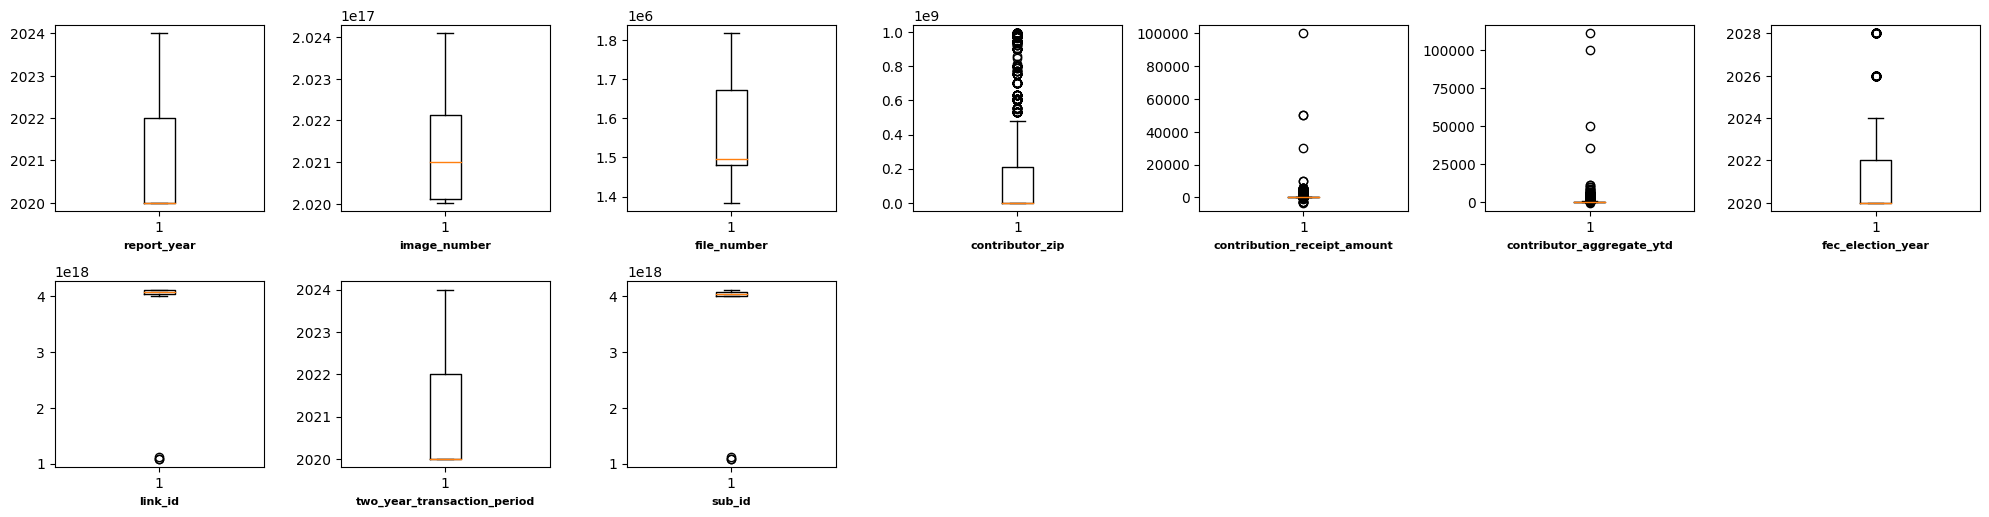

In [14]:
num_var = donations.select_dtypes(include= 'number').columns.tolist()
plt.figure(figsize=(20,10))

for i, var in enumerate(num_var):
  plt.subplot(4,7,1+i)
  plt.boxplot(donations[var].dropna())
  plt.xlabel(var,fontsize=8, weight='bold')

plt.tight_layout()

In [15]:
donations.select_dtypes(include='float').columns.tolist()

['contribution_receipt_amount',
 'contributor_aggregate_ytd',
 'fec_election_year']